# Lista 2

### Zaimplementowane biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.special import erfinv
from statsmodels.distributions.empirical_distribution import ECDF


### Zadanie 1

KstestResult(statistic=0.378, pvalue=2.9138472626247385e-12, statistic_location=0.9997297143027539, statistic_sign=-1)


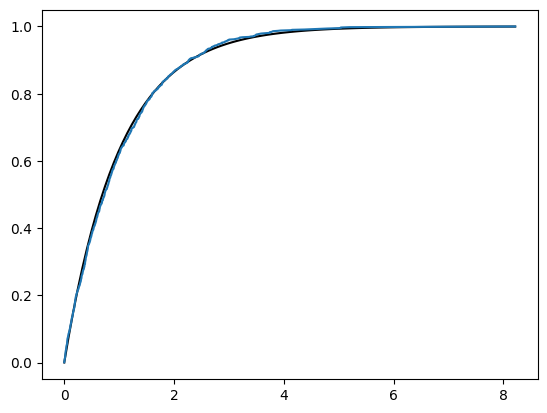

In [2]:
x = np.random.uniform(size = 1000)
def inverse_exp(lam, x):
    return (-1/lam)*np.log(x)
count, bins, ignored = plt.hist(inverse_exp(1,x), 100, density=True)
cdf = scipy.stats.expon.cdf(bins)
ecdf = ECDF(inverse_exp(1,x))

print(scipy.stats.kstest(inverse_exp(1,x), cdf))
plt.clf()
plt.plot(bins, cdf, c='black')
plt.plot(ecdf.x, ecdf.y)
plt.show()


KstestResult(statistic=0.564, pvalue=7.364253569573056e-28, statistic_location=0.9997562300211735, statistic_sign=-1)


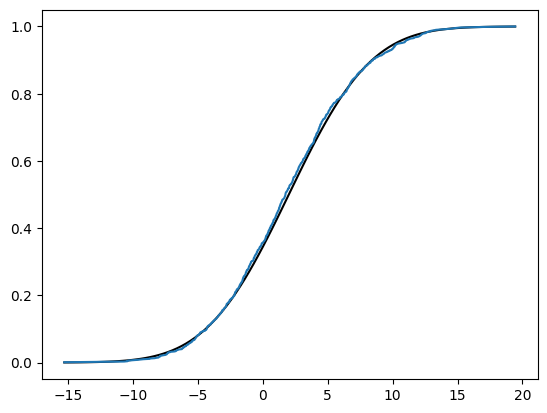

In [3]:
def inverse_norm(mi,sigma, x):
    return mi + sigma*np.sqrt(2)*erfinv(2*x-1)
count, bins, ignored = plt.hist(inverse_norm(2,5,x), 100, density=True)
cdf = scipy.stats.norm.cdf(bins,2,5)
ecdf = ECDF(inverse_norm(2,5,x))

print(scipy.stats.kstest(inverse_norm(2,5,x), cdf))
plt.clf()
plt.plot(bins, cdf, c='black')
plt.plot(ecdf.x, ecdf.y)
plt.show()

KstestResult(statistic=0.644, pvalue=8.104736301086064e-09, statistic_location=0.9220208696226307, statistic_sign=-1)


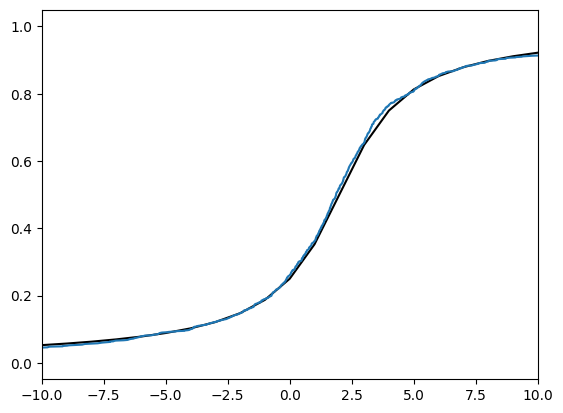

In [4]:
def inverse_cauchy(mi, gamma, x):
    return mi + gamma*np.tan(np.pi*(x-0.5))
bins = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
cdf = scipy.stats.cauchy.cdf(bins,2,2)
ecdf = ECDF(inverse_cauchy(2,2,x))

print(scipy.stats.kstest(inverse_cauchy(2,2,x), cdf))
plt.clf()
plt.xlim(-10,10)
plt.plot(bins, cdf, c='black')
plt.plot(ecdf.x, ecdf.y)
plt.show()

### Zadanie 2

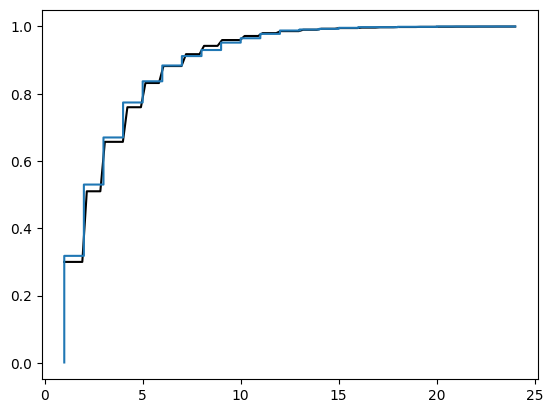

In [5]:
def inverse_geo(p, x):
    return np.ceil((np.log(1-x))/(np.log(1-p)))
count, bins, ignored = plt.hist(inverse_geo(0.3,x), 100, density=True)
cdf = scipy.stats.geom.cdf(bins,0.3)
ecdf = ECDF(inverse_geo(0.3,x))

plt.clf()
plt.plot(bins, cdf, c='black')
plt.step(ecdf.x, ecdf.y)
plt.show()

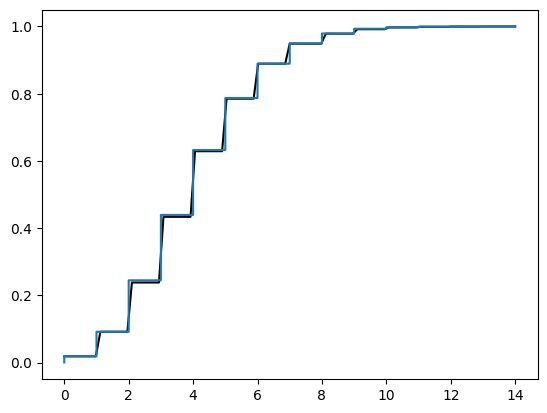

In [6]:
lamb = 4
u = np.random.uniform(0,1,10000)

def inverse_poisson(lamb, x):
    x = []
    for i in u:
        j=0
        n=0
        p = np.e**(-lamb)
        F = p
        while i > F:
            p=p*lamb/(n+1)
            F += p
            j += 1
            n += 1
        x.append(j)
    return x
count, bins, ignored = plt.hist(inverse_poisson(4,x), 100, density=True)
cdf = scipy.stats.poisson.cdf(bins,4)
ecdf = ECDF(inverse_poisson(4,x))

plt.clf()
plt.plot(bins, cdf, c='black')
plt.step(ecdf.x, ecdf.y)
plt.show()

In [24]:
p = [1.0/1024, 15.0/1024, 90.0/1024, 243.0/1024, 270.0/1024, 405.0/1024]
def table_lookup(values):
    lookup = []
    numerators = [i*1024 for i in values]
    for index, number in enumerate(numerators):
        lookup += [index]*int(number)
    return np.random.choice(lookup)
table_lookup(p)

5